In [30]:
# IMPORT DES LIBRAIRIES
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import importlib
import func as f
importlib.reload(f)

<module 'func' from '/Users/bastienalbizzati/Python/Projets-Git/2025-projet-S2-MMA-analyse-image/func.py'>

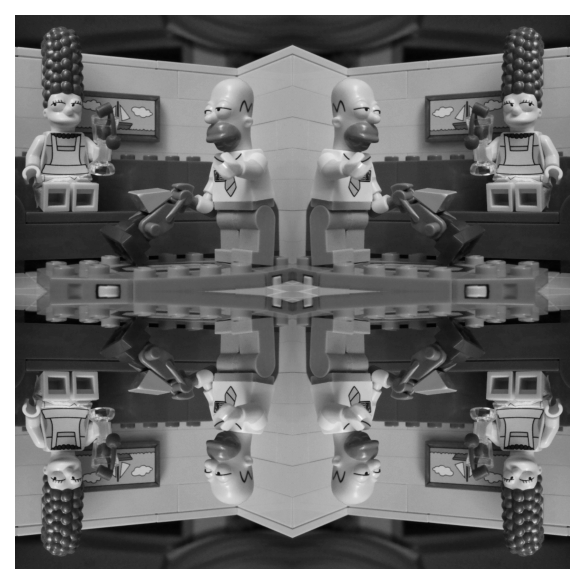

In [28]:
# Ouvrir l'image
p = plt.imread('simpson512g.png')
M,N = p.shape
p4 = f.period_im(p)

# Affichage
plt.figure(dpi=150)
plt.imshow(p4,cmap='gray')
plt.axis('off')
plt.show()

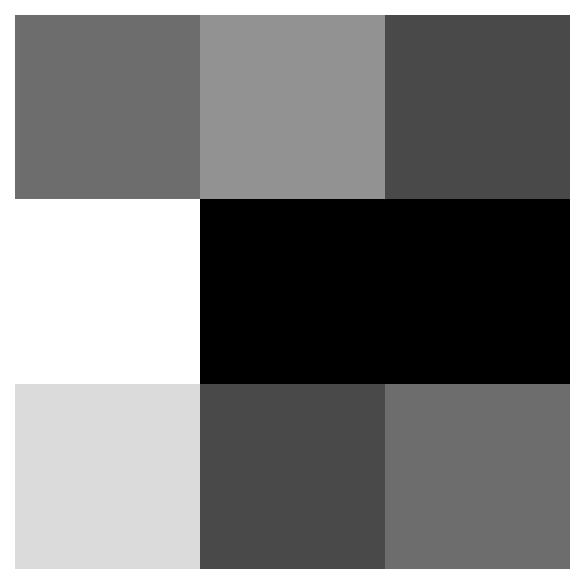

In [ ]:
romega = 1 # rayon de la fenêtre
nomega = (1 + 2*romega)**2 # nombre de pixels dans la fenêtre

k1 = 5000
k2 = 5000
uw = f.extract_w(p4, k1, k2, romega)
